<a href="https://colab.research.google.com/github/Dark-coder06/Harvard-CS50-AI/blob/main/Havard_CS50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Intelligence
#### 1. Search: To be able to search for a solution for any given problem.
#### 2. Knowledge: To be able to know info, use info and make infernces from that info.
#### 3. Uncertainity: If computer is not completely sure and how to deal with problem which can only be determined by a ceratain probability.
#### 4. Optimization: If a computer wants to optimize for a certain goal where there are multiples ways to solve a problem and we are looking for a better way or rather the best way to solve it.
#### 5. Learning: Can be able to learn from the given data to perform tasks which can be improved upon with better quality and quantity of data.
#### 6. Neural Networks: Draws inspiration from human intelligence and we can utilize a certain structure of the computer program to allow AI to perform tasks very effectively.
#### 7. Language:

# Search
#### Agent: Entity that perceives its environment and acts upon that environment.
<br>

#### State: A configuration of the agent and its environment.
##### Initial State: The state in which the agent begins.
##### Actions: Choices that can be made in any given state.
> ACTIONS(*s*) returns a set of actions that can be executed in state *s*.
<br>

#### Transition Model: A description of what state results from performing any applicable action in any state.
>RESULT(*s*,*a*) returns the state resulting from performing action *a* in state *s*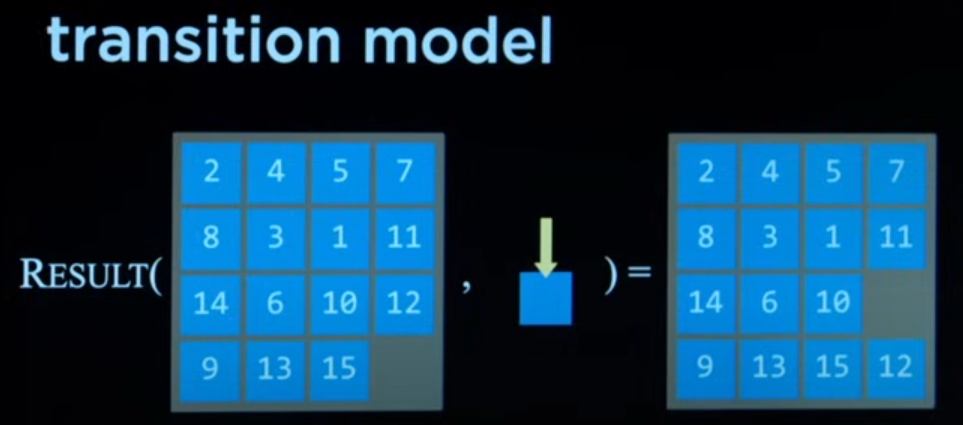



##### State Space: The set of all states reachable from the initial state by any sequence of of actions.
<br>

#### Goal Test: Way to determine whether a given state is a goal state.
#### Path Cost: Numerical cost associated with a given path.

## Search Problems
### -> Initial State
### -> Actions
### -> Transition Model
### -> Goal Test
### -> Path Cost Fuction
<br>

## Solution: A sequence of actions that leads from the initial state to a goal state.
## Optimal Solution: A solution that has the lowest path cost among all the solutions.
<br>

## Node: A way to represent a particular data for the problem.
> It is data structure that keeps track of:<br>
    -> A State<br>
    -> A Parent (node that generated this node)<br>
    -> An Action (action applied to parent to get node)<br>
    -> A Path Cost (from initial state to node)<br>

### Approach:
> -> Start with a frontier that contains the initial state.<br>
  -> Repeat:<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    -> If the frontier is empty, then no solution.<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    -> Remove a node from the frontier.<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    -> If node contains goal state, return the solution.<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    -> Expand node, add resulting nodes to the frontier.<br>
##### Problem with this approach is that it can be stuck in an infinite loop if there is a loop in the graph which will not be efficient.
### Revised Approach:
> -> Start with a frontier that contains the initial state.<br>
  -> Start with an empty explored set.<br>
  -> Repeat:<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    -> If the frontier is empty, then no solution.<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    -> Remove a node from the frontier.<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    -> If node contains goal state, return the solution.<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    -> Add the node to the explored set.<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    -> Expand node, add resulting nodes to the frontier if they aren't already in the frontier or the explored set.<br>


##Removing a node from the frontier:
### Stack -> Last-In-First-Out Data Structure
    Depth-First Search -> Algorithm that always expands the deepest node int the frontier
### Queue -> First-In-First-Out Data Structure
    Breadth-First Search -> Algorithm that always expands the shallowest node int the frontier
    

# Maze

In [2]:
import sys
from PIL import Image, ImageDraw

In [13]:
class Node():
  def __init__(self, state, parent, action):
    self.state = state
    self.parent = parent
    self.action = action

class StackFrontier():
    def __init__(self):
        self.frontier = []

    def add(self, node):
        self.frontier.append(node)

    def contains_state(self, state):
        return any(node.state == state for node in self.frontier)

    def empty(self):
        return len(self.frontier) == 0

    def remove(self):
        if self.empty():
            raise Exception("Empty Frontier")
        else:
            node = self.frontier[-1]
            self.frontier = self.frontier[:-1]
            return node

class QueueFrontier(StackFrontier):
    def remove(self):
        if self.empty():
            raise Exception("Empty Frontier")
        else:
            node = self.frontier[0]
            self.frontier = self.frontier[1:]
            return node

class Maze():
    def __init__(self, filename):

        with open(filename) as f:
            contents = f.read()

        if contents.count("A") != 1:
            raise Exception("Maze must have exactly one start point")
        if contents.count("B") != 1:
            raise Exception("Maze must have exactly one goal")

        contents = contents.splitlines()
        self.height = len(contents)
        self.width = max(len(line) for line in contents)

        self.walls = []
        for i in range(self.height):
            row = []
            for j in range(self.width):
                try:
                    if contents[i][j] == "A":
                        self.start = (i, j)
                        row.append(False)
                    elif contents[i][j] == "B":
                        self.goal = (i, j)
                        row.append(False)
                    elif contents[i][j] == " ":
                        row.append(False)
                    else:
                        row.append(True)
                except IndexError:
                    row.append(False)
            self.walls.append(row)

        self.solution = None

    def print(self):
        solution = self.solution[1] if self.solution is not None else None
        print()
        for i, row in enumerate(self.walls):
            for j, col in enumerate(row):
                if col:
                    print("█", end="")
                elif (i, j) == self.start:
                    print("A", end="")
                elif (i, j) == self.goal:
                    print("B", end="")
                elif solution is not None and (i, j) in solution:
                    print("*", end="")
                else:
                    print(" ", end="")
            print()
        print()

    def neighbors(self, state):
        row, col = state

        candidates = [
            ("up", (row - 1, col)),
            ("down", (row + 1, col)),
            ("left", (row, col - 1)),
            ("right", (row, col + 1))
        ]

        result = []
        for action, (r, c) in candidates:
            try:
                if not self.walls[r][c]:
                    result.append((action, (r, c)))
            except IndexError:
                continue
        return result

    def solve(self):
        self.num_explored = 0

        # Initialize frontier to just the starting position
        start = Node(state=self.start, parent=None, action=None)
        frontier = StackFrontier()
        frontier.add(start)

        # Initialize an empty explored set
        self.explored = set()

        #Keep looping until solution found
        while True:

            # If nothing left in frontier, then no path
            if frontier.empty():
                raise Exception("No Solution")

            # Choose a node from the frontier
            node = frontier.remove()
            self.num_explored += 1

            # If node is the goal, then we have a solution
            if node.state == self.goal:
                actions = []
                cells = []

                # Follow parent nodes to find solution
                while node.parent is not None:
                    actions.append(node.action)
                    cells.append(node.state)
                    node = node.parent
                actions.reverse()
                cells.reverse()
                self.solution = (actions, cells)
                return

            # Mark node as explored
            self.explored.add(node.state)

            # Add neighbors to frontier
            for action, state in self.neighbors(node.state):
                if not frontier.contains_state(state) and state not in self.explored:
                    child = Node(state=state, parent=node, action=action)
                    frontier.add(child)

f = input("Enter the file name: ")
m = Maze(f)
print("Maze: ")
m.print()
print("Solving...")
m.solve()
print("States Explored:", m.num_explored)
print("Solution:")
m.print()

Enter the file name: /Maze3.txt
Maze: 

██    █
██ ██ █
█B █  █
█ ██ ██
     ██
A██████

Solving...
States Explored: 17
Solution:

██****█
██*██*█
█B*█**█
█ ██*██
*****██
A██████



### We can use these 2 algorithms to find the solution for the maze though not the most optimmaly by either. This can be improved upon by making the algorithm more 'intelligent'. We can apply concepts like going towards the goal as comparing it to a 2D graph and moving towards the coordinates of the goal as a reasonable assumption although not everytime correct. We have two different distinctions in the search algorithms.

## Uninformed Search
> Search stratergy that uses no problem-specific knowledge<br>
> Eg - BFS and DFS
## Informed Search
>Search stratergy that uses problem-specific knowledge to find solutions more efficiently
### 1. Greedy Best-First Search
>Search Algorithm that expands the node that is closest to the goal, as estimated by a heuristic function *h(n)* like **Manhattan Distance**
### 2. A* Search
>Search Algorithm that expands node with lowest value of g(n) + h(n)<br>
>g(n) = cost to reach node<br>
>h(n) = estimated cost to goal<br>
>Optimal if:<br>
    > ---> h(n) is admissable (never overestimates the true cost), and<br>
    > ---> h(n) is consistent (for every node *n* and successor *n'* with step cost *c*, ***h(n)*<=*h(n')*+*c*)** <br>